# Diagnosing Your Data
## Healthcare Data Science Project  

In the healthcare industry, data is becoming increasingly important. Unfortunately, a definition of healthcare analytics is not something that is concretely defined. However, I would define healthcare analytics as the use of advanced computing technology with the ultimate goal of improving medical care. Let's take a closer look at this definition.  

### Healthcare analytics uses advanced computing technology  

At the time of this posting, we are roughly half-way through the year 2019. The impact that computers have had on our lives has grown exponentially...is showing no signs of slowing as we approach 2020. As we find it nearly impossible to pinpoint an area of our lives that is untouched by computers, tablets, and mobile phones, the healthcare industry is no exception. One of the major changes that we have seen in recent years has been a migration of paper patient charts to electronic health/medical records (EHR or EMR, respectively). Admittedly, much of this transition can be attributed to increased governmental incentives that are offered to providers for doing so. As this is happening, we are seeing a major uptick in various application and programs that are being written to capture demographic information, track vital signs, improve overall efficiency and communication, while taking major strides to improving health care for everyone.  

### Healthcare analytics improves medical care  

So, how exactly are we using healthcare analytics? The overall goal is to improve medical care. As broad as that seems, the approach has been broken down into three, more palatable, pillars--more commonly referred to as the healthcare triple aim: improving outcomes, reducing costs, and ensuring quality. Let's take a closer look at each of these aims.  

#### Better outcomes  
Intuitively, we can all relate to better healthcare outcomes. More specifically, better outcomes can include more timely and accurate diagnoses. This could lead to more effective and patient-specific treatments that we hope would not lead to any new infections. With hopes of an overall improved quality of life, despite semantic differences in defining "improved quality", we ultimately aim for improved quality and longevity of life free of unnecessary pain and worry.  

#### Lower costs  
While the goal is to have better health outcomes, unfortunately, there are finite resources trying to address an infinite problem. While various blood tests and orders for imaging can aid providers in the detection and treatment of different ailments, they are often exorbidantly expensive. Using computers, healthcare analytics and data science a patient's medical record could be subject to some mathematical calculaton and a few algorithms to create pretty accurate risk screenings for the different ailments, for far less money!  

#### Ensure quality  
The data that is constantly being collected and analyzed is not exclusive to patients--providers are also having data related to their performance with their patients collected. The industry is moving away from solely paying providers for specific services, and is instead providing reimbursement that is more performance-based. WE DON'T REALLY CARE HOW MANY PATIENTS YOU CAN SEE IN A DAY...we care more about improving the outcomes of the ones you treat.

## Where is the practicality?  

What does this all look like "in real life?" Well, the state of Florida collects emergency department (ED) data each quarter of the year. There is incredibly valuable information in these files. Each quarter contains roughly 2 million encounters (patient visits) and over 100 attributes for each encounter.  
  
But, having this sort of data can raise (and hopefully begin to answer) several questions.  
##### What types of patients are frequenting the ED?  
##### When are most of the patients coming (and is that contingent upon payer source or how they arrive at the ED in the first place)?
##### Does Ethnicity and Race make a difference?  
  

I decided to use four quarters for this project--quarters 3 and 4 of 2017 and quarters 1 and 2 of 2018. In the code below, I selected the columns of interest from the entire dataset. Below, I am showing the first 5 rows of the data, to see how the data looks and that the information is in the appropriate format.

In [1]:
import pandas as pd
import numpy as np
import glob
import math
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.concat([pd.read_csv(f , usecols=['SYS_RECID','ZIPCODE','YEAR','QTR','FAC_REGION','ETHNICITY','RACE','SEX','AGE','WEEKDAY','PTSTATE','PTCOUNTRY','ADMSRC','HR_ARRIVAL','EDHR_DISCH','PT_STATUS','PAYER','REASON_CDE','ATTEN_PHYN'],
                            dtype= "category") for f in glob.glob('/Users/EricJC/Documents/Data/*.csv')], ignore_index = True, sort=False)
df.head()



,SYS_RECID,YEAR,QTR,FAC_REGION,ETHNICITY,RACE,SEX,AGE,WEEKDAY,ZIPCODE,PTSTATE,PTCOUNTRY,ADMSRC,HR_ARRIVAL,EDHR_DISCH,PT_STATUS,PAYER,REASON_CDE,ATTEN_PHYN
0,100140850,2018,1,11,E2,3,F,39,2,33168,FL,US,01,14,16,01,H,S50.371A,1639495245
1,100140851,2018,1,11,E2,5,M,89,2,33154,FL,US,01,11,14,01,B,T83.022A,1639495245
2,100140852,2018,1,11,E2,3,M,17,2,33147,FL,US,01,13,13,01,D,R09.81,1639495245
3,100140853,2018,1,11,E2,3,F,40,2,33147,FL,US,01,10,13,01,D,M25.511,1639495245
4,100140854,2018,1,11,E2,3,F,42,2,33142,FL,US,01,13,14,01,D,T30.0,1639495245


Ultimately, with this particular project, I was interested in the characteristics of the individuals whom presented to the ED for a diagnosis related to opioid overdose/abuse. Those specific dx codes are shown below. I thought that it would also be interesting to see if there was a difference in the time of day that the patients presented to the ED. For the first analysis, I maintained the format of the hours of arrival (from 00 to 23). For later analysis, I adjusted the format of the time of arrival to reflect late/early. Late would be from 8pm until 8am (basically non-business hours), while early is everything else.

In [50]:
def is_opioid_dx(opioid_dx):
    if opioid_dx in ['F11.10','F11.120','F11.121',
'F11.122','F11.129','F11.14','F11.150','F11.151','F11.159','F11.181','F11.182','F11.188',
'F11.19','F11.20','F11.220','F11.221','F11.222','F11.229','F11.23','F11.24','F11.250',
'F11.251','F11.259','F11.281','F11.282','F11.288','F11.29','F11.90','F11.920','F11.921',
'F11.922','F11.929','F11.93','F11.94','F11.950','F11.951','F11.959','F11.981','F11.982',
'F11.988','F11.99','T40.0X1A','T40.0X1D','T40.0X1S','T40.0X4A','T40.0X4D','T40.0X4S',
'T40.0X5A','T40.0X5D','T40.0X5S','T40.1X1A','T40.1X1D','T40.1X1S','T40.1X4A','T40.1X4D',
'T40.1X4S','T40.2X1A','T40.2X1D','T40.2X1S','T40.2X4A','T40.2X4D','T40.2X4S','T40.2X5A',
'T40.2X5D','T40.2X5S','T40.3X1A','T40.3X1D','T40.3X1S','T40.3X4A','T40.3X4D','T40.3X4S',
'T40.3X5A','T40.3X5D','T40.3X5S','T40.4X1A','T40.4X1D','T40.4X1S','T40.4X4A','T40.4X4D',
'T40.4X4S','T40.4X5A','T40.4X5D','T40.4X5S','T40.601A','T40.601D','T40.601S','T40.604A',
'T40.604D','T40.604S','T40.605A','T40.605D','T40.605S','T40.691A','T40.691D','T40.691S',
'T40.694A','T40.694D','T40.694S','T40.695A','T40.695D','T40.695S','T40.0X2A','T40.0X2D',
'T40.0X2S','T40.0X3A','T40.0X3D','T40.0X3S','T40.1X2A','T40.1X2D','T40.1X2S','T40.1X3A',
'T40.1X3D','T40.1X3S','T40.2X2A','T40.2X2D','T40.2X2S','T40.2X3A','T40.2X3D','T40.2X3S',
'T40.3X2A','T40.3X2D','T40.3X2S','T40.3X3A','T40.3X3D','T40.3X3S','T40.4X2A','T40.4X2D',
'T40.4X2S','T40.4X3A','T40.4X3D','T40.4X3S','T40.602A','T40.602D','T40.602S','T40.603A',
'T40.603D','T40.603S','T40.692A','T40.692D','T40.692S','T40.693A','T40.693D','T40.693S']:
        return 1
    else:
        return 0
df['REASON_CDE_01'] = df['REASON_CDE'].apply(is_opioid_dx).astype('category')

def is_night(arrtime):
    arrtime_int = int(arrtime)
    if ((arrtime_int >= 0) & (arrtime_int < 8)):
        return 1
    elif ((arrtime_int >= 20) & (arrtime_int < 23)):
        return 1
    else:
        return 0
df['HR_ARRIVAL_01'] = df['HR_ARRIVAL'].apply(is_night).astype('category')

df['AGE'] = df['AGE'].astype(int)
def roundup(x, n=10):
    res = math.ceil(x/n)*n
    if (x%n < n/2)and (x%n>0):
        res-=n
    return res

num = df['AGE']
df['AGES'] = [roundup(n) for n in num]
df['AGES'] = df['AGES'].astype('category')


    

In [3]:
df_cat = df.select_dtypes(include=['category']).copy()
df_cat['FAC_REGION'] = df_cat['FAC_REGION'].cat.codes
df_cat['ETHNICITY'] = df_cat['ETHNICITY'].cat.codes
df_cat['RACE'] = df_cat['RACE'].cat.codes
df_cat['SEX'] = df_cat['SEX'].cat.codes
df_cat['WEEKDAY'] = df_cat['WEEKDAY'].cat.codes
df_cat['EDHR_DISCH'] = df_cat['EDHR_DISCH'].cat.codes
df_cat['PT_STATUS'] = df_cat['PT_STATUS'].cat.codes
df_cat['PAYER'] = df_cat['PAYER'].cat.codes

## Boxplot of Ages of Patients Grouped by Sex
Below is a boxplot that is showing the distribution of ages of the patients presenting to the emergency departments grouped by sex. It is important to note that the data included values that would be considered outliers by this plot. Patients who are:   
    Age 0 = 0 to 28 days  
    Age 777 = 29 to 364 days (considered an outlier)  
    Age 888 = 100 years and older (considered an outlier)  
    Age 999 = Unknown (considered an outlier)  
However, for the purposes of this plot, those data points did not add any real value and were dropped from the plot.  

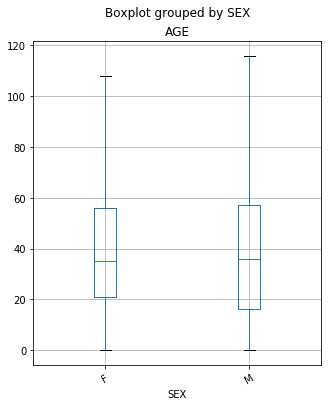

In [4]:
age_boxplot = df.boxplot('AGE','SEX', rot=30, figsize=(5,6), showfliers=False)

From the plot above, we are able to see that there are some subtle differences between the ages of the females and the males presenting in the ED. While the median age (50% of the data) is the same for both females and males, there is a bit of a difference between quartile 1 (25% of the data) between the classes. For females, we see that Q1 is at age 21, while in the male group it is much sooner at 17. Also, the maximum age for both females and males showed differences. The oldest female that went to the ED was 108 years-old, while the oldest male was 116 years-old. (It is important to remember that outliers were removed from the plot.)

## Boxplot of Patients Grouped by Payer Against Hr of Arrival  
Below is a boxplot that is showing the distribution of the time (hours) of the of the patients presenting to the emergency departments grouped by their respective payer source. The list of the different payer codes are below:   

A single character upper case alpha code identifying the expected primary source of reimbursement for services rendered based on the patient’s status at the time of reporting. This was a required entry.  
A – Medicare  
B – Medicare Managed Care  
C – Medicaid  
D – Medicaid Managed Care  
E – Commercial Health Insurance  
H – Workers’ Compensation  
I – TriCare or Other Federal Government    
J – VA  
K – Other State/Local Government  
L – Self Pay – Patients with no insurance coverage  
M – Other  
N – Non-Payment – Includes charity, professional courtesy, no charge, research/clinical trial, refusal to pay.  
O – Kidcare - Includes Healthy Kids, Medikids, and Children’s Medical Services  
P – Unknown   
Q – Commercial Liability Coverage  

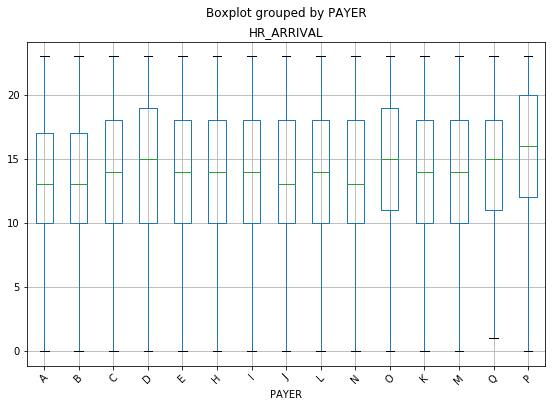

In [5]:
df['HR_ARRIVAL'] = df['HR_ARRIVAL'].astype(int)
time_payer_boxplot = df.boxplot('HR_ARRIVAL','PAYER', rot=45, figsize=(9,6), showfliers=False)

With this particular chart, a difference was not expecting between minimum values or the maximum values as it related to the payer source. It seems intuitive that patients, regardless of their insurance status, would come at any hour throughout the day. Interestingly, there were no patient encounters in the ED between the hours of 12am and 1am for patients with Commercial Liability Coverage.  
  
It is also interesting that patients with Kidcare (O on the plot), Unknown (P on the plot), and Commercial Liability Coverage (Q on the plot) all showed a Q1 (25% of the data) closer to noon, while all of the others were at 10am. The same three groups, with the addition of Medicaid Managed Care (D on the plot), also showed significantly higher medians than the other payers. They are all showing a median time of arrival of 3pm and later.    
  
It would be interesting to delve a bit deeper into this. With Kidcare, Medicaid Managed Care, and Unknown, there may be some lifestyle characteristics that play a role in this. These individuals are likely lower income (based on the requirements for Florida's Medicaid), which may provide a foundation for researching the types of jobs these patients have. 3pm is also around the time that most schools have dismissed their students.  
  
There are a lot of speculations that can be made, but this is definitely something that should be explored further.

## Boxplot of Patients Grouped by Admission Source Against Hr of Arrival  
  
This was not a self-reported field, but contains a two digit code or one character alpha code. The admission source provides us with information about where the patient came from prior to reaching the ED. The codes are:  

01 – Non-health care facility point of origin  
02 – Clinic or Physician’s Office  
04 – Transfer from another Hospital  
05 – Transfer from a Skilled Nursing Facility (SNF) or Intermediate Care Facility (ICF)  
06 – Transfer from another health care facility  
08 – Court/Law Enforcement  
09 – Information Not Available  
D – Transfer between units within the same hospital  
E – Transfer from Ambulatory Surgery Center  
F – Transfer from hospice and under a hospice plan of care or enrolled in a hospice program  



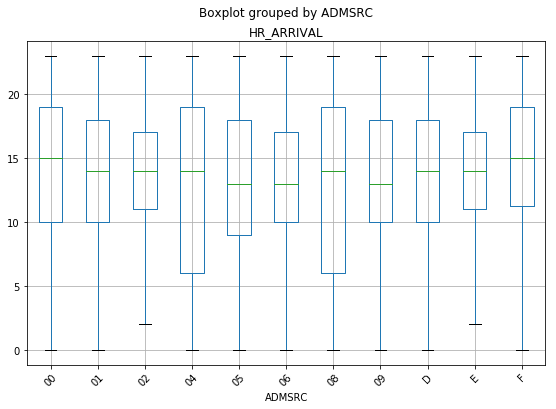

In [6]:
time_admsrc_boxplot = df.boxplot('HR_ARRIVAL','ADMSRC', rot=45, figsize=(9,6), showfliers=False)

The plot above shows a couple of things that are interesting. Other hospitals and law enforcement have the largest spread of times that they are the source of patients going to the ED. This seems logical, as they are the sites that are "fully operational" during more hours of the day.

## Bar Chart With Count of Patients Grouped by Ethinicity and Race  
Self designated by the patient or patient’s parent or guardian. The patient’s ethnic background shall be reported as one choice from the following list of alternatives. This was a required entry.  
E1 – Hispanic or Latino. A person of Mexican, Puerto Rican, Cuban, Central or South American or other Spanish culture or origin, regardless of race.  
E2 – Non-Hispanic or Latino. A person not of any Spanish culture or origin.  
E7 – Unknown  
Self designated by the patient or patient’s parent or guardian. A single digit code identifying the patient’s racial background. Like Ethnicity, this was also a required entry.  
1 – American Indian or Alaskan Native  
2 – Asian  
3 – Black or African American  
4 – Native Hawaiian or Other Pacific Islander  
5 – White  
6 – Other  
7 – Unknown  

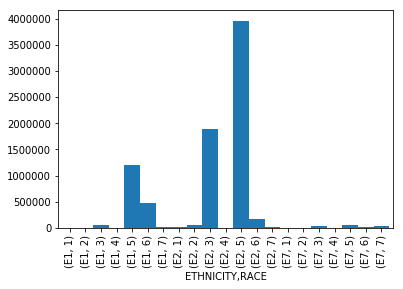

In [7]:
eth_race = df.groupby(['ETHNICITY', 'RACE']).size()
eth_race.plot(kind='bar', width=1)

This chart is showing a basic breakdown of the number of patients presenting to the ED grouped by their respective Ethinicity and Race. The group that was the highest utilizer of the ED during the observed time period, were patients who identified as non-Hispanic, White. The second highest utilizer, were patients who identified as non-Hispanic, Black or African-American.  
  
I think it would be useful to compare ED utilization rates of these particular groups as it compares to their overall representation in the state of Florida. (As an example, if non-Hispanic, Whites make up 80% of the population in Florida, and they are 80% of the utilization...this behavior would be expected.)

## Bar Chart With Count of Patients Grouped by Ages (in Decades)  

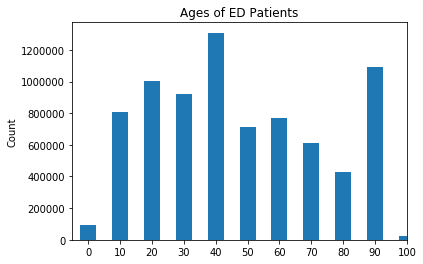

In [8]:
x_age = df['AGES'].unique()
age_count =  df['AGES'].value_counts()

plt.bar(x_age, age_count, align='center', width=5, alpha=1)
plt.xticks(x_age)
plt.ylabel('Count')
plt.title('Ages of ED Patients')
plt.xlim(right=100, left=-5)
plt.show()

The chart above shows that highest utilizers of the ED in the state of Florida are between the ages of 40 and 49. The second highest utilizers are patients between the ages of 90 and 99, and the third highest utilizers being between the ages 20 and 29.

## Pairplot of a Subset of the Data  
  
This visualization can be useful when trying to determine if there are any correlations that exist in your dataset between all of the features. Because much of the data is discrete, we are not really seeing any apparent correlations in our dataset.


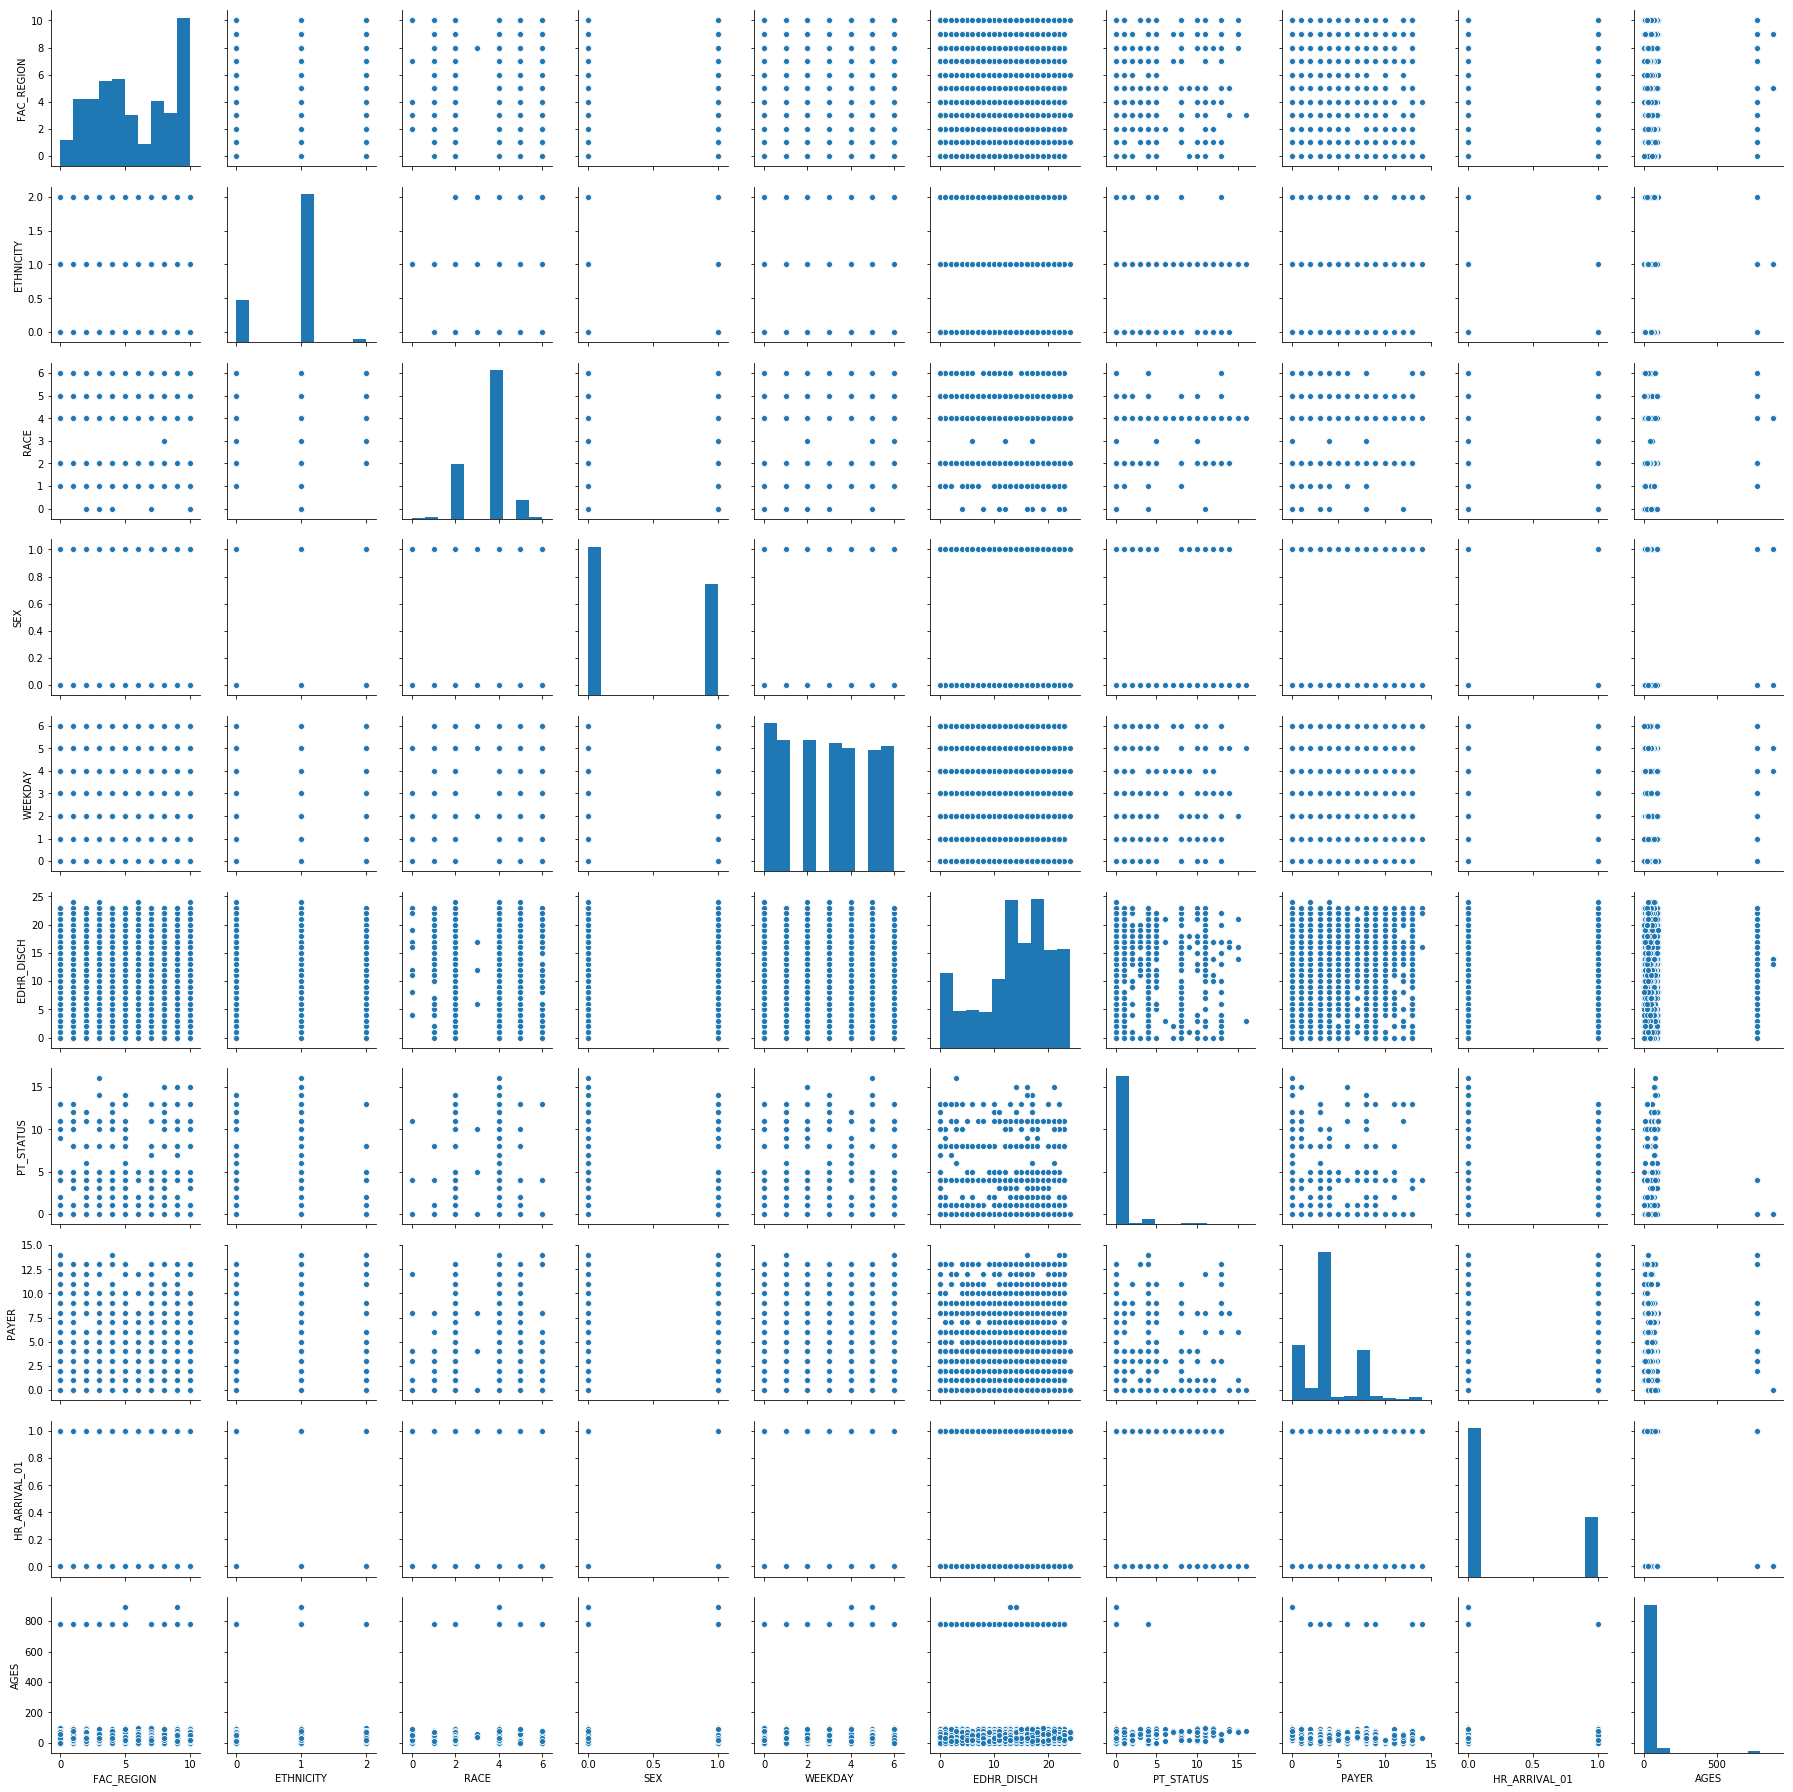

In [25]:
sns.pairplot(df_cat.sample(10000))

## Beginnings of Machine Learning  
  
Below, we have taken the dataset and split it into two different groups (Train and Test) to train a couple of different Machine Learning models and test them. The "target" or "response" variable that will be used in these models is the Reason Code (or the Diagnosis given to the patient upon arrival). I am ultimately interested in determining what features are a good predictor of whether a patient will present to the ED for a reason related to opiod overdose/abuse. Below is some of the code for reference.

In [10]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [13]:
def split_target(data, target_name):
       target = data[[target_name]]
       data.drop(target_name, axis=1, inplace=True)
       return (data, target)
X, y = split_target(df_cat, 'REASON_CDE_01')

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
#Just to check...
print(y_train.groupby('REASON_CDE_01').size())

REASON_CDE_01
0    5989152
1      10848
dtype: int64


In [17]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [18]:
X_train.loc[:] = X_train.loc[:].apply(pd.to_numeric)
X_test.loc[:] = X_test.loc[:].apply(pd.to_numeric)

In [19]:
X_train_cols = X_train.columns
X_test_cols = X_test.columns

In [20]:
X_train = X_train.values
X_test = X_test.values

### Logistic Regression model for the data  
  
First, let's discuss the performance of the training and testing sets. They are close together, which suggests the model did not overfit to the training set. The accuracy is approximately 99.8%.  
  
Looking at the coefficients, we can confirm that they are aligned with what our other visualizations have shown and  make intuitive sense. The features with the highest coefficient are related to the age of the person going to the ED. Ethnicity also had a relatively high coefficient. Unfortunately, the dataset that was used to train and test these models did not contain all of the features of the original dataset. With that, the information is limited in its usefulness. 

In [22]:
from sklearn.linear_model import LogisticRegression

clfs = [LogisticRegression()]
for clf in clfs:
    clf.fit(X_train, y_train.values.ravel())
    print(type(clf))
    print('Training accuracy: ' + str(clf.score(X_train, y_train)))
    print('Validation accuracy: ' + str(clf.score(X_test, y_test)))
    coefs = {
        'column': [X_train_cols[i] for i in range(len(X_train_cols))],
        'coef': [clf.coef_[0,i] for i in range(len(X_train_cols))]
       }
    df_coefs = pd.DataFrame(coefs)
    print(df_coefs.sort_values('coef', axis=0, ascending=False))


/Users/EricJC/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<class 'sklearn.linear_model.logistic.LogisticRegression'>
Training accuracy: 0.998192
Validation accuracy: 0.99819
             column      coef
13          AGES_30  1.395667
26        AGES_1000  1.358803
14          AGES_40  1.065158
1         ETHNICITY  0.776601
3               SEX  0.720423
21         AGES_110  0.616572
25         AGES_890  0.557225
2              RACE  0.526358
23         AGES_140  0.508831
12          AGES_20  0.484582
15          AGES_50  0.424646
7             PAYER  0.134826
6         PT_STATUS  0.116782
4           WEEKDAY  0.041699
16          AGES_60  0.035861
5        EDHR_DISCH -0.003810
0        FAC_REGION -0.034794
22         AGES_120 -0.102344
17          AGES_70 -0.503429
20         AGES_100 -1.477283
18          AGES_80 -1.665732
19          AGES_90 -1.800897
10           AGES_0 -2.130661
24         AGES_780 -2.652653
11          AGES_10 -3.062398
9   HR_ARRIVAL_01_1 -3.343189
8   HR_ARRIVAL_01_0 -3.604864


### Random Forest model  
  
With this model, the accuracy is 99.8%. Unlike the logistic regression, this model is showing other features may be related to one of the diagnosis codes related to opioid overdose/abuse. For example, the day of the week, the region (in Florida) where the facility is locate, and the payer may have some impact. It will be interesting to increase the number of features that are included in both of these ML models to see if it results in something even more useful.

In [53]:
from sklearn.ensemble import RandomForestClassifier

clfs_rf = [RandomForestClassifier(n_estimators=10)]
for clf in clfs_rf:
    clf.fit(X_train, y_train.values.ravel())
    print(type(clf))
    print('Training accuracy: ' + str(clf.score(X_train, y_train)))
    print('Validation accuracy: ' + str(clf.score(X_test, y_test)))
    imps = {
        'column': [X_train_cols[i] for i in range(len(X_train_cols))],
        'imp': [clf.feature_importances_[i] for i in range(len(X_train_cols))]}
    df_imps = pd.DataFrame(imps)
    print(df_imps.sort_values('imp', axis=0, ascending=False))

<class 'sklearn.ensemble.forest.RandomForestClassifier'>
Training accuracy: 0.9984845
Validation accuracy: 0.998071
             column           imp
5        EDHR_DISCH  3.560950e-01
4           WEEKDAY  1.936233e-01
0        FAC_REGION  1.915416e-01
7             PAYER  9.858439e-02
6         PT_STATUS  5.195780e-02
2              RACE  3.464373e-02
1         ETHNICITY  2.509306e-02
3               SEX  1.683374e-02
8   HR_ARRIVAL_01_0  5.930048e-03
9   HR_ARRIVAL_01_1  5.272944e-03
13          AGES_30  3.792687e-03
12          AGES_20  3.631944e-03
15          AGES_50  3.093545e-03
14          AGES_40  3.023825e-03
16          AGES_60  2.946155e-03
17          AGES_70  8.259156e-04
18          AGES_80  4.865573e-04
10           AGES_0  4.649437e-04
11          AGES_10  4.597915e-04
26        AGES_1000  3.401072e-04
19          AGES_90  3.060731e-04
24         AGES_780  3.057345e-04
21         AGES_110  2.238277e-04
23         AGES_140  2.149098e-04
25         AGES_890  1.599514e-04


### Neural Network model  
  
This model takes quite a bit more time than the others...but we will save it for next time.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Tx = scaler.transform(X_train)
X_test_Tx = scaler.transform(X_test)

# Fit models that require scaling (e.g. neural networks)
hl_sizes = [150,100,80,60,40,20]
nn_clfs = [MLPClassifier(hidden_layer_sizes=(size,), random_state=42, verbose=True) for size in hl_sizes]
for num, nn_clf in enumerate(nn_clfs):
    print(str(hl_sizes[num]) + '-unit network:')
    nn_clf.fit(X_train_Tx, y_train.values.ravel())
    print('Training accuracy: ' + str(nn_clf.score(X_train_Tx, y_train)))
    print('Validation accuracy: ' + str(nn_clf.score(X_test_Tx, y_test)))
